/Users/nirwanaamir/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 1000 images belonging to 20 classes.
1000/1000 [==============================] - 79s 78ms/step
Accuracy: 95.80%


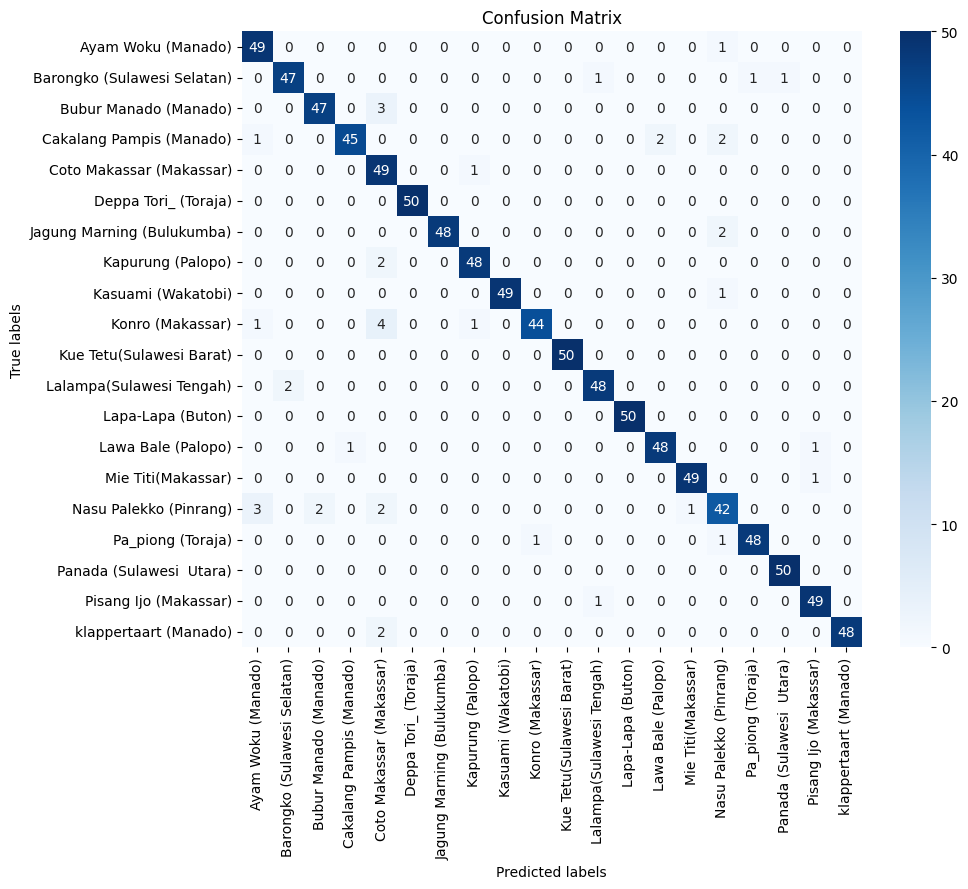

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

def load_dataset(dataset_path, target_size, batch_size):
    datagen = ImageDataGenerator(rescale=1./255)
    dataset = datagen.flow_from_directory(
        dataset_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )
    return dataset

def print_info(test_gen, preds):
    # Compute confusion matrix
    true_labels = test_gen.classes
    predicted_labels = np.argmax(preds, axis=1)
    cm = confusion_matrix(true_labels, predicted_labels)

    # Calculate accuracy
    accuracy = np.sum(true_labels == predicted_labels) / len(true_labels)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    # Display confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_gen.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Path to the saved model
model_path = '/Users/nirwanaamir/Downloads/Salinan CNN-Batik-Classification-main/skenario2.h5'

# Path to the dataset
dataset_path = '/Users/nirwanaamir/Downloads/dataset-2'

# Target size for images (adjust according to your model)
target_size = (224, 224)

# Batch size for validation
batch_size = 1  # Set to 1 to validate one image at a time

# Load the model
model = load_model(model_path)

# Load the dataset
dataset = load_dataset(dataset_path, target_size, batch_size)

# Perform validation and print information
predictions = model.predict(dataset)
print_info(dataset, predictions)


In [2]:
def print_misclassified_images(test_gen, preds):
    true_labels = test_gen.classes
    predicted_labels = np.argmax(preds, axis=1)

    misclassified_images = []
    for i in range(len(true_labels)):
        if true_labels[i] != predicted_labels[i]:
            misclassified_images.append(test_gen.filenames[i])

    misclassified_images = np.array(misclassified_images)
    misclassified_labels = [test_gen.class_indices[img.split('/')[0]] for img in misclassified_images]

    for label, images in zip(test_gen.class_indices.keys(), test_gen.class_indices.values()):
        print(f"Misclassified images for label '{label}':")
        for i, img_label in enumerate(misclassified_labels):
            if img_label == images:
                print(misclassified_images[i])
        print()

# Print misclassified images
print_misclassified_images(dataset, predictions)


Misclassified images for label 'Ayam Woku (Manado)':
Ayam Woku (Manado)/40.png

Misclassified images for label 'Barongko (Sulawesi Selatan)':
Barongko (Sulawesi Selatan)/18.jpeg
Barongko (Sulawesi Selatan)/25.jpg
Barongko (Sulawesi Selatan)/47.jpg

Misclassified images for label 'Bubur Manado (Manado)':
Bubur Manado (Manado)/36.png
Bubur Manado (Manado)/43.png
Bubur Manado (Manado)/6.png

Misclassified images for label 'Cakalang Pampis (Manado)':
Cakalang Pampis (Manado)/11.png
Cakalang Pampis (Manado)/12.png
Cakalang Pampis (Manado)/44.png
Cakalang Pampis (Manado)/47.png
Cakalang Pampis (Manado)/7.png

Misclassified images for label 'Coto Makassar (Makassar)':
Coto Makassar (Makassar)/15.jpg

Misclassified images for label 'Deppa Tori_ (Toraja)':

Misclassified images for label 'Jagung Marning (Bulukumba)':
Jagung Marning (Bulukumba)/38.png
Jagung Marning (Bulukumba)/42.png

Misclassified images for label 'Kapurung (Palopo)':
Kapurung (Palopo)/25.png
Kapurung (Palopo)/36.png

Misclass